# Numerical solving coupled ODEs with `odeint` 

In this module so far, the only manner in which we have numerically solved ordinary differential equations, in particular (coupled) first order differential equations, is programming the explicit Euler method on our own in Python (or using a spreadsheet).  However, solving coupled first order differential equations is a very common and important problem, and, consequently, there are already codes that are available to solve this.  

Within Python, a popular function to solve first order differential equations is `odeint`.  You can find more information about this function from the [SciPy manual page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).  Examples for how to use `odeint` can be found at [apmonitor.com site](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations).

In this document, we will go through some details and examples of how to use `odeint` to solving first order ordinary differential equations.



## Single first order differential equations

The function `odeint` is part of the `scipy` library.  It numerically solves first order differential equations of the form:
\begin{align*}
\frac{dy}{dx} &= f(y, x)
\end{align*}
where $f(y,x)$ is some function of both the dependent and independent variables $y$ and $x$, respectively.  

The function `odeint` *requires* three arguments.  The first argument is the name of a function that will return the value of the derivative as a function of $y$ and $x$ (the dependent and independent variables).  The second argument is the initial value of the dependent variable $y$.  The third required argument is a list of values of the dependent variable $x$ at which the solution of the dependent variable $y$ is wanted.  The output of `odeint` is a list that contains the values of the solution for $y(x)$ at the values of $x$ which were given to `odeint`.  

In the following, we demonstrate precisely how `odeint` is used to solve some example differential equations.


## Example 1

As an example of using `odeint`, we examine the differential equation
\begin{align*}
\frac{dy}{dt} &= - y
\end{align*}
with the initial condition $y(0)=1$.  The analytical solution to this problem is
\begin{align*}
y(x)=e^{-x}
.
\end{align*}

This equation is exactly in the form that `odeint` requires, with the derivative of the dependent variable isolated on the left side of the equation.  From this, we find that $f(y,x)=-y$ for this particular equation.  Below, is a code that uses `odeint` to solve this equation.



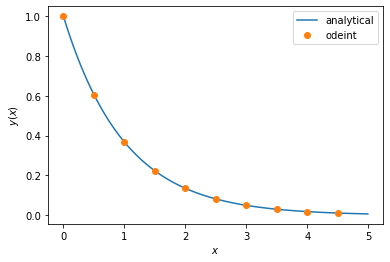

In [40]:
import numpy as np

# this statement imports the function odeint from the scipy library
from scipy.integrate import odeint  

# This defines that function f, which gives dy/dx in terms of y and x
def f(y, x):
    return -y

# create a list of values for the independent variable x 
# at which we want the solution to the equation
dx = 0.5
x_data = np.arange(0.0, 5.0, dx)


# The variable y0 is the value of y at x=0 (i.e. y(0)=1.0
y0 = 1.0


# This is statement calls odeint to solve the differential equation.
# The first argument is the function f that returns the value of
# the derivative dy/dx at a given value of y and x.  The second 
# argument is the initial value of y, and the third argument is a 
# list of values of the independent variable x at which we want
# the solution.
# The function odeint returns a list that contains the solution
sol = odeint(f, y0, x_data)
#print(sol)

# put the solution from odeint into the list y_data
y_data = sol[:,0]


# determine analytical solution to the differential equation
x_analytical = np.arange(0.0, 5.0, 0.01)
y_analytical = [np.exp(-x) for x in x_analytical]


# plot a comparison of the numerical and analytical solutions
import pylab as plt
plt.plot(x_analytical, y_analytical, label='analytical')
plt.plot(x_data, y_data, 'o', label='odeint')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()
plt.show()


Notice that in the list `x_data` we provided a fairly large step for the independent variable `x`, and normally we would expect for such a large step size, the numerical solution would be inaccurate.  However, `odeint` automatically determines its own step size to use for its calculations and only returns the solutions at the values of `x` listed in the input list `x_data`.

## Example 2:

In this example, we take a problem from a previous coursework:
\begin{align*}
  (1-x^2) \frac{dy}{dx} - xy = 3
\end{align*}
where $y(0)=1$.  This is a linear first order differential equation, which has the analytical solution
\begin{align*}
y(x) &= \frac{3\arcsin x}{\sqrt{1-x^2}} + \frac{1}{\sqrt{1-x^2}}
.
\end{align*}

In order to use `odeint`, we need to first rearrange the differential equation so that the derivative of the dependent variable is isolated on the left side of the equation:
\begin{align*}
\frac{dy}{dx} - xy = \frac{xy + 3}{1-x^2}
\end{align*}
With this rearrangement, we find that 
\begin{align*}
f(y,x)= \frac{xy + 3}{1-x^2}
\end{align*}


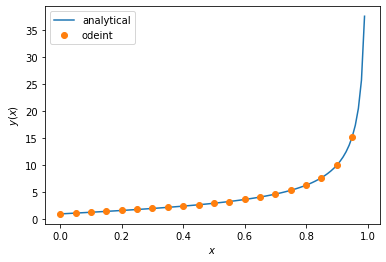

In [46]:
import numpy as np

# this statement imports the function odeint from the scipy library
from scipy.integrate import odeint  

# This defines that function f, which gives dy/dx in terms of y and x
def f(y, x):
    return (x*y+3)/(1-x*x)

# create a list of values for the independent variable x 
# at which we want the solution to the equation
dx = 0.05
x_data = np.arange(0.0, 1.0, dx)


# The variable y0 is the value of y at x=0 (i.e. y(0)=1.0
y0 = 1.0


# This is statement calls odeint to solve the differential equation.
# The first argument is the function f that returns the value of
# the derivative dy/dx at a given value of y and x.  The second 
# argument is the initial value of y, and the third argument is a 
# list of values of the independent variable x at which we want
# the solution.
# The function odeint returns a list that contains the solution
sol = odeint(f, y0, x_data)
#print(sol)

# put the solution from odeint into the list y_data
y_data = sol[:,0]


# determine analytical solution to the differential equation
x_analytical = np.arange(0.0, 1.0, 0.01)
y_analytical = [(3.*np.arcsin(x)+1)/np.sqrt(1-x*x) for x in x_analytical]


# plot a comparison of the numerical and analytical solutions
import pylab as plt
plt.plot(x_analytical, y_analytical, label='analytical')
plt.plot(x_data, y_data, 'o', label='odeint')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()
plt.show()


## Example 3

In this example, we will solve the tank drainage problem that was covered in a previous video.
From a mass balance on the amount of water in a tank of cross-sectional area $A$, we find
\begin{align*}
\rho A \frac{dh}{dt}
&= - \rho K A_0 \left(gh\right)^{1/2}
\end{align*}
where $h$ is the height of the liquid level in the tank, $\rho$ is the density of water, $K$ is a valve coefficient, $A_0$ is the area of the outlet, and $g$ is the acceleration due to gravity.

The first thing we need to do in order to use `odeint` is to rearrange the differential equation into a form where the derivative of the dependent function (the function we are solving for) is isolated on the left side of the equation.  This can be done by simply dividing both sides of the equation by $\rho A$:
\begin{align*}
\frac{dh}{dt}
&= - \frac{K A_0}{A} \left(gh\right)^{1/2}
.
\end{align*}
From this, we find that the function $f$ is given by:
\begin{align*}
f(y, x) &= - \frac{K A_0}{A} \left(gh\right)^{1/2}
.
\end{align*}
This then allows us to use `odeint` to solve the differential equation.

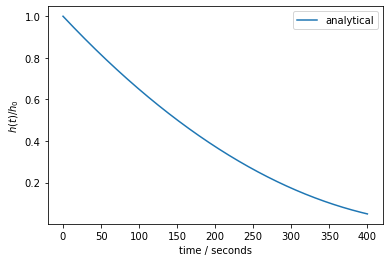

In [39]:
import numpy as np
import pylab as plt

# define the parameters of the system
g = 9.81  # acceleration due to gravity / m s^{-2}
K = 1.0
D = 1.6
A = np.pi*D**2 / 4.0 
A0 = 0.0025 # area of outlet / m^2


# define the function that returns the value of the derivative of the
# dependent function (i.e. dh/dt) given the values of h and t.
def deriv(h, t):
    return -K*A0/A * np.sqrt(g*h)

# initial condition
h0 = 1.0  # initial liquid level in tank / m
dt = 0.1
tmax = 4.0e2
t_data = np.arange(0.0, tmax, 0.01)


# use odeint to solve the differential equation
sol = odeint(deriv, h0, t_data)


# copy the solution into the list h_data
h_data = sol



# plot liquid level in tank as a function of time
plt.plot(t_data, h_data, label='analytical')

plt.xlabel(r'time / seconds')
plt.ylabel(r'$h(t)/h_0$')


plt.legend()
plt.show()

## Coupled differential equations

In the previous section, we demonstrated how `odeint` can be used to solve a single first order differential equation.  However, the function `odeint` can also solve systems of first order differential equations of the form:
\begin{align*}
\frac{dy_0}{dx} &= f_0(y_0, y_1,\dots, y_{n-1}, x)
\\
\frac{dy_1}{dx} &= f_1(y_0, y_1,\dots, y_{n-1},x)
\\
&\vdots
\\
\frac{dy_{n-1}}{dx} &= f_{n-1}(y_0, y_1,\dots,y_{n-1},x)
\end{align*}
This is a set of $n$ first order differential equations, which involves $n$ dependent functions $y_k(x)$, where $k=0$, $1$, \dots,
$n-1$, in terms of the independent variable $x$.  
In addition, we need to provide initial values for these $n$ dependent functions.

These types of equations appear often when we are dealing with systems where different physical processes are coupled to each other, such as energy transport coupled to mass flow.  We have also encountered these types of equations when we dealt with second order differential equations.  

The main difference in using `odeint` to solve these equations, as opposed to solving a single first order differential equation, is that we need to return a list of functions $f_0$, $f_1$, \dots, $f_{n-1}$ that give the derivatives of the dependent variables, not just a single function that gives the derivative of the dependent variable $y$.  Below, we give some examples of solving these types of equations using `odeint`.


### Example 1

As a first example of solving a set of coupled first order differential equations using `odeint`, we examine the system of equations:
\begin{align*}
\frac{dy_0}{dx} &= y_0 - \frac{1}{2}y_0 y_1
\\
\frac{dy_1}{dx} &= -\frac{3}{4}y_1 + \frac{1}{4}y_0y_1
\end{align*}
with the initial condition $y_0(0)=1$ and $y_1(0)=1$.

We see that the functions $f_0(y_0, y_1, x)$ and $f_1(y_0, y_1, x)$ are given by
\begin{align*}
f_0(y_0, y_1, x) &= y_0 - \frac{1}{2}y_0 y_1
\\
f_1(y_0, y_1, x) &= -\frac{3}{4}y_1 + \frac{1}{4}y_0y_1
\end{align*}
The Python code below uses the function `odeint` to solve these equations.

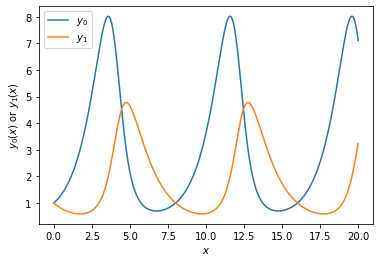

In [58]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint


# define derivatives
def f(y, x):
    y0, y1 = y # unpack list
    f = []
    f.append(y0 - 0.5*y0*y1)
    f.append(-0.75*y1+0.25*y0*y1)
    return f

# setup initial conditions
y0 = 1.0
y1 = 1.0
yinitial = [y0, y1]


# set the values of x at which we want the solution
dx = 0.01
xmax = 20.0
x_data = np.arange(0.0, xmax, dx)


# call odeint to solve the equations
sol = odeint(f, yinitial, x_data)

# unpack the solution into individual lists
y0_data = sol[:,0]
y1_data = sol[:,1]


# plot the variation of the variables y_0 & y_1 with x
plt.plot(x_data, y0_data, label='$y_0$')
plt.plot(x_data, y1_data, label='$y_1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y_0(x)$ or $y_1(x)$')
plt.show()

Also of interest for these equations is the variation of the dependent variables with each other.

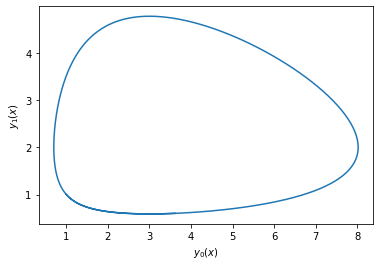

In [56]:
# plot the trajectory
plt.plot(y0_data, y1_data)
plt.xlabel('$y_0(x)$')
plt.ylabel('$y_1(x)$')
plt.show()

### Example 2:  Pendulum

As an example, we consider the equation of motion for a pendulum of mass $m$ that is attached to a fixed point with a string of length $l$.  In addition, we assume that a drag force acts on the mass, which has a magnitude $\mu v$, where $v$ is its speed.  The differential equation is given by
\begin{align*}
m l \frac{d^2\theta}{dt^2}
+ \mu l \frac{d\theta}{dt}
+ mg \sin\theta &= 0
.
\end{align*}
This equation needs to be supplemented by a set of two initial conditions which specify the values of $\theta(0)$ and $\theta'(0)$.

In this case, we choose the define the functions $y_0(x)=\theta(t)$ and $y_1(x)=\theta'(t)$, so the first order differential equations are
\begin{align*}
\frac{dy_0}{dt} &= y_1(t)
\\
\frac{dy_1}{dt} &= -\frac{\mu}{m}y_1(t) - \frac{g}{l}\sin(y_0(t))
\end{align*}
with the corresponding initial conditions $y_0(0)=\theta(0)$ and $y_1(0)=\theta'(0)$.  Below, we solve this equation numerically using `odeint`.

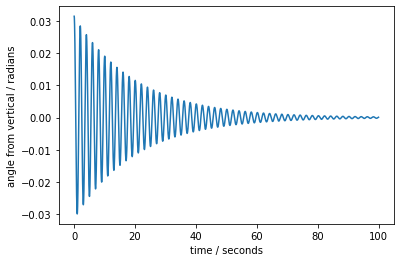

In [48]:
import numpy as np
import pylab as plt


# defining the pendulum system
l = 1.0    # length of string / m
mu = 1.0e-1   # drag factor / N s m^{-1}
m = 1.0    # mass / kg
g = 9.81   # acceleration due to gravity / m s^{-2}


# This function takes a list y, which contains the values of the 
# dependent variables y_0 and y_1, and the value of x, and returns a
# list which contains the derivatives of the functions 
def dydx(y, t):
    y0, y1 = y  # unpack the list y into the two variables y0 and y1
    f = []      # define the list
    f.append(y1)
    f.append(-y1*mu/m-np.sin(y0)*g/l) 
#    f.append(-y0)
    
    return f


# initial conditions
# We need to give the initial angle (in radians) and the angular
# velocity \dot{theta} (in radians per second)
theta0 = np.pi*0.01
theta1 = 0.0
y0 = [theta0, theta1]


# create a list of times at which we want the solution
dt = 0.01
tmax = 100.0
t_data = np.arange(0.0, tmax, dt)

# use odeint to solve the differential equation
sol = odeint(dydx, y0, t_data)


# unpack the solution into individual lists
y0_data = sol[:,0]
y1_data = sol[:,1]


# plot the solution
plt.plot(t_data, y0_data)
plt.ylabel('angle from vertical / radians')
plt.xlabel('time / seconds')
plt.show()


### Example 3: Projectile motion

In this example, we examine the motion of a spherical projectile of diameter $d$ and mass $m$ that is initially launched at an angle $\alpha$ from the horizontal at a speed $v_0$.  

The $x$- and $y$-component momentum balances yield the equations:
\begin{align*}
m\frac{dv_x}{dt}
&= - F_d \frac{v_x}{v}
\\
m\frac{dv_y}{dt} &= - mg - F_d \frac{v_y}{v}
\end{align*}
where $F_d$ is the magnitude of the drag force, which depends on the speed $v=(v_x^2+v_y^2)^{1/2}$ of the projectile.  The drag force has
the form
\begin{align*}
F_d &= C_d A \frac{1}{2}\rho_{\rm air} v^2
\end{align*}
where $C_d\approx0.5$ is the drag coefficient, $A=\pi d^2/4$ is the projected area of a sphere, $\rho_{\rm air}\approx1.2\,{\rm kg\,m^{-3}}$ is the density of air.

To use `odeint`, we need to isolate the derivatives of the dependent functions on the left side of the equations we want to solve:
\begin{align*}
\frac{dv_x}{dt}
&= - \frac{F_d}{m} \frac{v_x}{v}
\\
\frac{dv_y}{dt} &= - g - \frac{F_d}{m} \frac{v_y}{v}
\end{align*}
Now that we have cast the equations in the proper form, we can straightforwardly use `odeint` to solve the equations:

In the absence of drag, we can solve these equations analytically to give:
\begin{align*}
v_x(t) &= v_0\cos\alpha 
\\
v_y(t) &= v_0\sin\alpha - mg t
\end{align*}

\begin{align*}
x(t) &= v_0 t\cos\alpha
\\
y(t) &= v_0 t \sin\alpha - \frac{mg t^2}{2}
\end{align*}

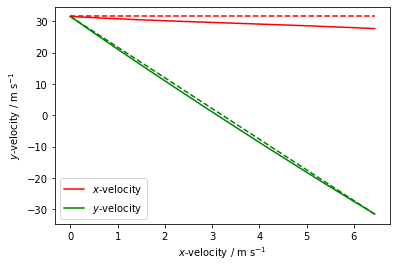

In [29]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

alpha = 45.0 * np.pi/180.  # angle from horizontal
v0 = 44.7 # initial projectile speed / m s^{-1}
         # 100 mph = 44.7 m s^{-1}
m = 1.0  # projectile mass / kg
d = 0.05 # diameter of sphere / m

g = 9.81 # acceleration due to gravity / m s^{-2}
rho_air = 1.2 # density of air / kg m^{-3}
Cd = 0.5
A0 = np.pi*d**2 / 4.0  # projected area of projectile / m^2


# define the functions that return the derivatives
def derivs(y, t):
    vx, vy = y  # unpack the variables
    v = np.sqrt(vx*vx+vy*vy)
    Fd = Cd * A0 * 0.5 * rho_air * v**2
    f = []
    f.append(-Fd/m*vx/v)
    f.append(-g - Fd/m*vy/v)
    return f


# determine the times at which to evaluate the solution
dt = 0.01
tmax = 2.0*v0*np.sin(alpha) / (m*g)
t_data = np.arange(0.0, tmax, dt)

# set the initial conditions
v0x = v0*np.cos(alpha)
v0y = v0*np.sin(alpha)
y0 = [v0x, v0y]  # initial conditions

# call odeint to solve the differential equations
sol = odeint(derivs, y0, t_data)

# solution with no drag
vx_ideal = [v0x for t in t_data]
vy_ideal = [v0y - m*g*t for t in t_data]

# plot projectile velocities with time
plt.plot(t_data, sol[:,0], label=r'$x$-velocity', color='red')
plt.plot(t_data, sol[:,1], label=r'$y$-velocity', color='green')
plt.plot(t_data, vx_ideal, color='red', ls='dashed')
plt.plot(t_data, vy_ideal, color='green', ls='dashed')
ymax = 0.5*(v0*np.sin(alpha))**2/(m*g)


plt.xlabel(r'$x$-velocity / m s$^{-1}$')
plt.ylabel(r'$y$-velocity / m s$^{-1}$')
plt.legend()

#plt.ylim([0.0, ymax])
plt.show()


Typically, we are interested in the trajectory of a projectile, rather than how its velocity varies with time.  To determine this, we need to supplement our differential equations with two more relations that link the position of the projectile to its velocity:
\begin{align*}
\frac{dx}{dt} &= v_x
\\
\frac{dy}{dt} &= v_y
\end{align*}
So to determine the trajectory, we need to add these two first order differential equations to our original set of differential equations.

The full set of differential equations that we then want to solve are
\begin{align*}
\frac{dv_x}{dt}
&= - \frac{F_d}{m} \frac{v_x}{v}
\\
\frac{dv_y}{dt} &= - g - \frac{F_d}{m} \frac{v_y}{v}
\\
\frac{dx}{dt} &= v_x
\\
\frac{dy}{dt} &= v_y
\end{align*}
These are already in a form that we can use to 

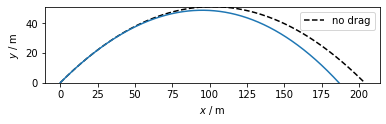

In [25]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

alpha = 45.0 * np.pi/180.  # angle from horizontal
v0 = 44.7 # initial projectile speed / m s^{-1}
         # 100 mph = 44.7 m s^{-1}
m = 1.0  # projectile mass / kg
d = 0.05 # diameter of sphere / m

g = 9.81 # acceleration due to gravity / m s^{-2}
rho_air = 1.2 # density of air / kg m^{-3}
Cd = 0.5
A0 = np.pi*d**2 / 4.0  # projected area of projectile / m^2


def derivs(y, t):
    vx, vy, x, y = y  # unpack the variables
    v = np.sqrt(vx*vx+vy*vy)
    Fd = Cd * A0 * 0.5 * rho_air * v**2
    f = []
    f.append(-Fd/m*vx/v)
    f.append(-g - Fd/m*vy/v)
    f.append(vx)
    f.append(vy)
    return f


dt = 0.01
tmax = 2.0*v0*np.sin(alpha) / (m*g)
t_data = np.arange(0.0, tmax, dt)

v0x = v0*np.cos(alpha)
v0y = v0*np.sin(alpha)
x_ideal = [v0x*t for t in t_data]
y_ideal = [v0y*t - 0.5*m*g*t*t for t in t_data]


y0 = [v0*np.sin(alpha), v0*np.cos(alpha), 0.0, 0.0]
sol = odeint(derivs, y0, t_data)


# plot projectile trajectory
plt.axes().set_aspect(aspect=1)

plt.plot(x_ideal, y_ideal, ls='dashed', color='black', label='no drag')
plt.plot(sol[:,2], sol[:,3])
ymax = 0.5*(v0*np.sin(alpha))**2/(m*g)


plt.xlabel(r'$x$ / m')
plt.ylabel(r'$y$ / m')
plt.legend()

plt.ylim([0.0, ymax])
plt.show()


Note that even though we have taken into account drag on the motion of a projectile, this model is still quite crude.  One of the biggest approximations we made is that the drag coefficient $C_d$ is a constant.  In reality, it will depend on the speed of the sphere.  Also, we have neglected the spin of the sphere and its influence on its motion.  Note that these and other effects can be included in our model, although it will complicate our equations.  This additional complication, however, will not pose much difficulty in using `odeint` so solve the resulting equations.


Some further reading on trajectories of spheres are shown below:
- [Drag of a sphere](https://www.grc.nasa.gov/WWW/K-12/airplane/dragsphere.html)
- [Aerodynamics of soccer](https://www.grc.nasa.gov/WWW/K-12/airplane/soccer.html)
- [Aerodynamics of baseball](https://www.grc.nasa.gov/WWW/K-12/baseball/index.html)